# Installation of Pyterrier

In [ ]:

!pip install python-terrier


     |████████████████████████████████| 97 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 53.2 MB/s 
     |████████████████████████████████| 69 kB 6.5 MB/s 
     |████████████████████████████████| 255 kB 61.1 MB/s 
     |████████████████████████████████| 41 kB 286 kB/s 
     |████████████████████████████████| 294 kB 52.5 MB/s 
     |████████████████████████████████| 126 kB 49.2 MB/s 
     |████████████████████████████████| 6.4 MB 39.7 MB/s 
     |████████████████████████████████| 1.2 MB 22.6 MB/s 
     |████████████████████████████████| 596 kB 24.9 MB/s 
     |████████████████████████████████| 72 kB 1.4 MB/s 
     |████████████████████████████████| 291 kB 14.7 MB/s 
     |████████████████████████████████| 59 kB 5.5 MB/s 
     |████████████████████████████████| 45 kB 2.9 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.8.0-py3-none-any.whl size=103883 sha256=ae1f2edea251f25fde848d822129f1eb8e7f6e3518925683feaae9b1dbf0476d
  Stored in directory: /root/.cac

In [ ]:
import pyterrier as pt

pt.init()

terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.8.0 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



# Loading and indexing dataset

In [ ]:
dataset = pt.get_dataset("msmarco_passage")
bm25 = pt.BatchRetrieve.from_dataset(dataset, "terrier_stemmed_text", wmodel="BM25")

/usr/local/lib/python3.7/dist-packages/pyterrier/datasets.py:278: UserWarning: Downloading index of > 2GB.
  warn("Downloading index of > 2GB.")


data.direct.bf:   0%|          | 0.00/486M [00:00<?, ?iB/s]

data.document.fsarrayfile:   0%|          | 0.00/177M [00:00<?, ?iB/s]

data.inverted.bf:   0%|          | 0.00/377M [00:00<?, ?iB/s]

data.lexicon.fsomapfile:   0%|          | 0.00/100M [00:00<?, ?iB/s]

data.lexicon.fsomaphash:   0%|          | 0.00/0.99k [00:00<?, ?iB/s]

data.lexicon.fsomapid:   0%|          | 0.00/4.47M [00:00<?, ?iB/s]

data.meta-0.fsomapfile:   0%|          | 0.00/295M [00:00<?, ?iB/s]

data.meta.idx:   0%|          | 0.00/67.5M [00:00<?, ?iB/s]

data.meta.zdata:   0%|          | 0.00/1.91G [00:00<?, ?iB/s]

data.properties:   0%|          | 0.00/4.33k [00:00<?, ?iB/s]

md5sums:   0%|          | 0.00/537 [00:00<?, ?iB/s]

11:01:11.966 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1.9 GiB of memory would be required.


# Running experiment for baseline BM25
Metric of importance is ndcg@100

In [ ]:
from pyterrier.measures import *
dataset = pt.get_dataset("msmarco_passage")
topics = dataset.get_topics("test-2019")
qrels= dataset.get_qrels("test-2019")
#dataset.get_topics("test-2019").iloc[3]

exp1 = pt.Experiment(
    [bm25],
    topics,
    qrels,
    filter_by_qrels=True,
    perquery=True,
    eval_metrics=['recip_rank','num_rel','num_ret','num_rel_ret','recall_10','recall_100','recall_1000','ndcg_cut_5','ndcg_cut_10','ndcg_cut_100'],
)
exp1


msmarco-test2019-queries.tsv.gz:   0%|          | 0.00/4.18k [00:00<?, ?iB/s]

2019qrels-docs.txt:   0%|          | 0.00/183k [00:00<?, ?iB/s]

,name,qid,measure,value
90,BR(BM25),1037798,num_ret,1000.000000
91,BR(BM25),1037798,num_rel,13.000000
92,BR(BM25),1037798,num_rel_ret,13.000000
93,BR(BM25),1037798,recip_rank,0.333333
94,BR(BM25),1037798,recall_10,0.076923
...,...,...,...,...
135,BR(BM25),962179,recall_100,0.240000
136,BR(BM25),962179,recall_1000,1.000000
137,BR(BM25),962179,ndcg_cut_5,0.000000
138,BR(BM25),962179,ndcg_cut_10,0.000000


Some pandas manipulation of results table for better visualization, here although multiple metrics are present, we sort the table with ascending ndcg@100 scores

In [ ]:
exp = exp1.copy()
exp = exp.pivot_table('value', ['name', 'qid'], 'measure')

# exp.columns = exp.columns.droplevel(0) #remove amount
# exp.columns.name = None               #remove categories
exp = exp.reset_index()  
exp = exp.drop('name', 1)
exp = exp.sort_values(by=['ndcg_cut_10'])
# recall 1000 == metric below
# exp['rel_percent'] = exp['num_rel_ret']/exp['num_rel']
exp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


measure,qid,ndcg_cut_10,ndcg_cut_100,ndcg_cut_5,num_rel,num_rel_ret,num_ret,recall_10,recall_100,recall_1000,recip_rank
42,962179,0.000000,0.114814,0.000000,25.0,25.0,1000.0,0.000000,0.240000,1.000000,0.025000
13,1121709,0.000000,0.000000,0.000000,12.0,1.0,1000.0,0.000000,0.000000,0.083333,0.002874
30,443396,0.069431,0.059042,0.000000,94.0,7.0,1000.0,0.010638,0.031915,0.074468,0.125000
31,451602,0.122273,0.180223,0.113053,154.0,77.0,1000.0,0.012987,0.194805,0.500000,0.333333
2,1063750,0.142811,0.053524,0.124566,276.0,6.0,1000.0,0.007246,0.018116,0.021739,0.333333
0,1037798,0.152866,0.327592,0.199260,13.0,13.0,1000.0,0.076923,0.615385,1.000000,0.333333
20,148538,0.163883,0.253502,0.051390,101.0,85.0,1000.0,0.029703,0.267327,0.841584,0.200000
34,490595,0.223715,0.545412,0.191347,55.0,53.0,1000.0,0.054545,0.727273,0.963636,0.500000
7,1113437,0.226504,0.229049,0.198235,77.0,64.0,1000.0,0.051948,0.272727,0.831169,0.500000
35,527433,0.293011,0.232415,0.410489,75.0,32.0,1000.0,0.026667,0.160000,0.426667,1.000000


# Loading the corpus of the dataset
This is mainly for error analysis of the queries, and for analyzing the passages retrived manually

In [ ]:
import pandas as pd
topics

df = pd.read_csv(dataset.get_corpus()[0], sep='\t', names=['id','passage'])

collection.tar.gz:   0%|          | 0.00/987M [00:00<?, ?iB/s]

In [ ]:
# Renaming column ids to match the passage df for later concatenation
df = df.rename(columns={'id':'docid'})
df

,docid,passage
0,0,The presence of communication amid scientific ...
1,1,The Manhattan Project and its atomic bomb help...
2,2,Essay on The Manhattan Project - The Manhattan...
3,3,The Manhattan Project was the name for a proje...
4,4,versions of each volume as well as complementa...
...,...,...
8841818,8841818,When metal salts emit short wavelengths of vis...
8841819,8841819,Thousands of people across the United States w...
8841820,8841820,"The recipe that creates blue, for example, inc..."
8841821,8841821,"On Independence Days of yore, old-timey crowds..."


In [ ]:
pd.options.display.max_colwidth = 500
pd.merge(bm25.search('when was the salvation army formed'), df, on='docid')

,qid,docid,docno,rank,score,query,passage
0,1,8689056,8689056,0,38.585656,when was the salvation army formed,"Contact The Salvation Army USA - Eastern Territory . We Are Most Grateful For Your Support and Interest in The Salvation Army. Please direct all Media and Marketing inquiries to our public relations personnel. All other questions should be directed to your local Salvation Army or using the email form found below. Your Questions Are Important To Us Please use the contact tab below to contact us via email. Locations For Immediate Assistance Contact Form If you need immediate assistance, please..."
1,1,8689054,8689054,1,38.471748,when was the salvation army formed,Salvation Army Locations & Hours near San Francisco. 1 Salvation Army - San Francisco. 2 Salvation Army - San Francisco. 3 Salvation Army - San Francisco. 4 Salvation Army - San Francisco. 5 Salvation Army - Daly City. 6 Salvation Army - Daly City. 7 Salvation Army - Daly City. 8 Salvation Army - South San Francisco. 9 Salvation Army - Colma.
2,1,5773189,5773189,2,36.879666,when was the salvation army formed,"Find other Salvation Army locations in these cities. 1 Wheeling, West Virginia Salvation Army Locations. 2 Marysville, Washington Salvation Army Locations. 3 Murrells Inlet, South Carolina Salvation Army Locations. 4 Los Banos, California Salvation Army Locations. 5 Greenfield, California Salvation Army Locations. 6 Fargo, North Dakota Salvation Army Locations."
3,1,4309122,4309122,3,36.837668,when was the salvation army formed,"The Salvation Army. The Salvation Army accepts used goods donations, including hardback and paperback books. The donations go to stock the Salvation Army store, or to provide reading materials for Salvation Armyâs homeless shelters. You can find drop-off locations in your community on the Salvation Army website."
4,1,8689057,8689057,4,36.039113,when was the salvation army formed,"Contact The Salvation Army. USA - Eastern Territory. We Are Most Grateful For Your Support and Interest in The Salvation Army. Please direct all Media and Marketing inquiries to our public relations personnel. All other questions should be directed to your local Salvation Army or using the email form found below. Your Questions Are Important To Us. Please use the contact tab below to contact us via email. Locations For Immediate Assistance Contact Form. If you need immediate assistance, plea..."
...,...,...,...,...,...,...,...
995,1,7868707,7868707,995,15.177380,when was the salvation army formed,"1.1 A person who freely enrols for military service rather than being conscripted, especially a member of a force formed by voluntary enrolment and distinct from the regular army."
996,1,8039387,8039387,996,15.177380,when was the salvation army formed,"Eventually, over the course of World War II, the Army formed five airborne divisions (11th, 13th, 17th, 82d, and 101st) along with several separate parachute infantry regiments and battalions."
997,1,4512869,4512869,997,15.164332,when was the salvation army formed,"Britain, France and Russia formed the Triple Entente. Before this in 1904, Britain and France had signed the Entente Cordial and in 1907, Britain and Russia signed the Anglo â¦ -Russian.he Triple Alliance and the Triple Entente were formed after the Franco Prussian War (1870-1871). Germany annexed the French provinces of Alsace and Lorraine, which incurr â¦ ed French hatred. France was also fearful of Germany' military might. The German army had defeated the French army in a matter of ..."
998,1,4864386,4864386,998,15.163305,when was the salvation army formed,If you see the history of Pakistan army you will see that Pakistan army face a 7times bigger Indian army more than 3 times ^^ defeat Indian army 2 times 1965 and 1999 kargil war. No other army has such records even US army.


In [ ]:
# worst qids from model along with query text
worst_queries =[]
for row in exp.head(5).itertuples():
    qid = row[1]
    query = topics.loc[topics['qid'] == row[1], 'query'].item()
    worst_queries.append((row[1], query))
worst_queries


[('962179', 'when was the salvation army founded'),
 ('1121709', 'what are the three percenters'),
 ('443396', 'lps laws definition'),
 ('451602', 'medicare s definition of mechanical ventilation'),
 ('1063750', 'why did the us volunterilay enter ww1')]

In [ ]:
# best qids from model along with query text
best_queries =[]
for row in exp.tail(5).itertuples():
    qid = row[1]
    query = topics.loc[topics['qid'] == row[1], 'query'].item()
    best_queries.append((row[1], query))
best_queries = best_queries[::-1]
best_queries


[('168216', 'does legionella pneumophila cause pneumonia'),
 ('156493', 'do goldfish grow'),
 ('131843', 'definition of a sigmet'),
 ('359349', 'how to find the midsegment of a trapezoid'),
 ('855410', 'what is theraderm used for')]

In [46]:
search_df = bm25.search('what is theraderm used for')
print(search_df)
print(df.columns)
pd.options.display.max_colwidth = 500
comb = pd.merge(search_df, df, on='docid')
print(comb)
# for passage in comb.iloc[0:10].passage:
#   print(passage)

# Create graph best queries rank vs. BM25 scores 
def create_queryscore_dicts(queries):
  query_scores_dict = {}
  for query in queries:
    query_df = bm25.search(query[1])
    combined = pd.merge(query_df, df, on="docid")
    query_scores = []
    for score in combined.iloc[0:100].score:
      query_scores.append(score)
    if query[0] == '855410':
      query_scores_dict[query[0]] = (query_scores, list(range(5)))
    else:
      query_scores_dict[query[0]] = (query_scores, list(range(100)))
  return query_scores_dict




  qid    docid    docno  rank      score                       query
0   1  8651775  8651775     0  25.624201  what is theraderm used for
1   1  8651776  8651776     1  25.253417  what is theraderm used for
2   1  8651772  8651772     2  24.501527  what is theraderm used for
3   1  8651771  8651771     3  23.454053  what is theraderm used for
4   1  8651770  8651770     4  22.492470  what is theraderm used for
Index(['docid', 'passage'], dtype='object')
  qid    docid    docno  rank      score                       query  \
0   1  8651775  8651775     0  25.624201  what is theraderm used for   
1   1  8651776  8651776     1  25.253417  what is theraderm used for   
2   1  8651772  8651772     2  24.501527  what is theraderm used for   
3   1  8651771  8651771     3  23.454053  what is theraderm used for   
4   1  8651770  8651770     4  22.492470  what is theraderm used for   

                                                                                                             

In [47]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

# plot lines
best_query_scores = create_queryscore_dicts(best_queries)
worst_query_scores = create_queryscore_dicts(worst_queries)


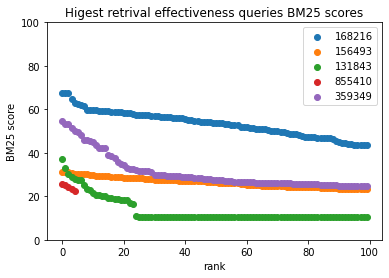

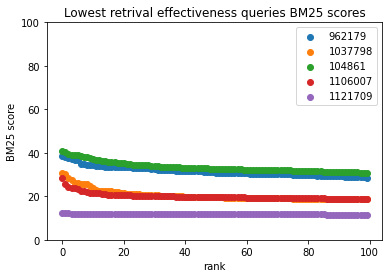

In [48]:
for qid, scores in best_query_scores.items():
  plt.scatter(scores[1], scores[0], label=qid)
plt.ylim([0,100])
plt.legend()
plt.xlabel("rank")
plt.ylabel("BM25 score")
plt.title("Higest retrival effectiveness queries BM25 scores")
plt.savefig('best_bm25.png')
plt.show()

for qid, scores in worst_query_scores.items():
  plt.scatter(scores[1], scores[0], label=qid)
plt.ylim([0,100])
plt.legend()
plt.xlabel("rank")
plt.ylabel("BM25 score")
plt.title("Lowest retrival effectiveness queries BM25 scores")
plt.savefig('worst_bm25.png')
plt.show()

[[1.         0.04683509]
 [0.04683509 1.        ]]


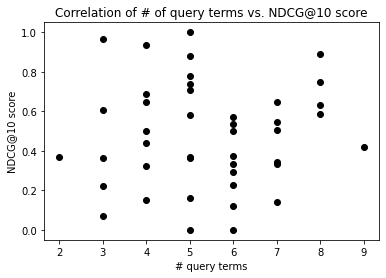

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

scores_and_text = pd.merge(exp, topics, on='qid')

sizes = []
for query in scores_and_text['query'].to_list():
  sizes.append(len(query.split()))

scores_and_text['query_size'] = sizes
scores_and_text
print(np.corrcoef(scores_and_text['query_size'].to_list(), scores_and_text['ndcg_cut_10'].to_list()))
plt.plot(scores_and_text['query_size'].to_list(), scores_and_text['ndcg_cut_10'].to_list(), 'o', color='black')
plt.xlabel('# query terms')
plt.ylabel('NDCG@10 score')
plt.title('Correlation of # of query terms vs. NDCG@10 score')
plt.savefig('bm25_corr.png')
plt.show()


In [ ]:
# pd.options.display.max_colwidth = 500
# df[df['docid']== 1051494].passage

# Trying out Learn to Rank

In [ ]:
index = dataset.get_index("terrier_stemmed")
pipeline = pt.FeaturesBatchRetrieve(index, wmodel="BM25", features=["SAMPLE","WMODEL:Tf", "WMODEL:PL2"])

data.direct.bf:   0%|          | 0.00/486M [00:00<?, ?iB/s]

data.document.fsarrayfile:   0%|          | 0.00/177M [00:00<?, ?iB/s]

data.inverted.bf:   0%|          | 0.00/377M [00:00<?, ?iB/s]

data.lexicon.fsomapfile:   0%|          | 0.00/100M [00:00<?, ?iB/s]

data.lexicon.fsomaphash:   0%|          | 0.00/0.99k [00:00<?, ?iB/s]

data.lexicon.fsomapid:   0%|          | 0.00/4.47M [00:00<?, ?iB/s]

data.meta.idx:   0%|          | 0.00/67.5M [00:00<?, ?iB/s]

data.meta.zdata:   0%|          | 0.00/193M [00:00<?, ?iB/s]

data.properties:   0%|          | 0.00/4.29k [00:00<?, ?iB/s]

md5sums:   0%|          | 0.00/480 [00:00<?, ?iB/s]

In [ ]:
from sklearn.model_selection import train_test_split
ttopics = dataset.get_topics('train')
tqrels = dataset.get_qrels('train')

print(ttopics.shape)
print(tqrels.shape)


queries.tar.gz:   0%|          | 0.00/18.0M [00:00<?, ?iB/s]

qrels.train.tsv:   0%|          | 0.00/10.1M [00:00<?, ?iB/s]

In [ ]:
print(ttopics.shape)
print(tqrels.shape)
tqrels['label'].value_counts()

(808731, 2)
(532761, 3)


1    532761
Name: label, dtype: int64

In [ ]:
import pandas as pd
train_queries = ttopics.sample(500, replace=False)
train_queries

train_qrels = pd.merge(tqrels, train_queries, on="qid")
train_qrels = train_qrels[['qid', 'docno', 'label']]
train_qrels['label'].value_counts()

1    331
Name: label, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=400)
rf_pipe = pipeline >> pt.ltr.apply_learned_model(rf)
rf_pipe.fit(train_queries, train_qrels)

In [ ]:
l2r_exp = pt.Experiment(
    [bm25 % 50, rf_pipe], 
    dataset.get_topics('test-2019'), 
    dataset.get_qrels('test-2019'), 
    ['recip_rank','num_rel','num_ret','num_rel_ret','recall_10','recall_100','recall_1000','ndcg_cut_5','ndcg_cut_10','ndcg_cut_100'], 
    filter_by_qrels=True,
    perquery=True,
    names=["BM25 Baseline", "LTR"])

In [ ]:
l2r = l2r_exp.copy()
l2r = l2r.pivot_table('value', ['name', 'qid'], 'measure')

# exp.columns = exp.columns.droplevel(0) #remove amount
# exp.columns.name = None               #remove categories
l2r = l2r.reset_index()  
l2r = l2r.drop('name', 1)
l2r = l2r.sort_values(by=['ndcg_cut_10'])
# recall 1000 == metric below
# exp['rel_percent'] = exp['num_rel_ret']/exp['num_rel']
l2r

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


measure,qid,ndcg_cut_10,ndcg_cut_100,ndcg_cut_5,num_rel,num_rel_ret,num_ret,recall_10,recall_100,recall_1000,recip_rank
42,962179,0.000000,0.024957,0.000000,25.0,1.0,50.0,0.000000,0.040000,0.040000,0.025000
43,1037798,0.000000,0.071438,0.000000,13.0,13.0,1000.0,0.000000,0.153846,1.000000,0.030303
44,104861,0.000000,0.064343,0.000000,141.0,121.0,1000.0,0.000000,0.049645,0.858156,0.090909
47,1106007,0.000000,0.133428,0.000000,60.0,31.0,1000.0,0.000000,0.150000,0.516667,0.066667
13,1121709,0.000000,0.000000,0.000000,12.0,0.0,50.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
28,359349,0.891957,0.670408,0.943473,56.0,21.0,50.0,0.178571,0.375000,0.375000,1.000000
81,855410,0.895972,0.895972,0.895972,4.0,4.0,5.0,1.000000,1.000000,1.000000,1.000000
18,131843,0.933746,0.675737,1.000000,64.0,22.0,50.0,0.140625,0.343750,0.343750,1.000000
21,156493,0.963412,0.594943,0.946488,133.0,48.0,50.0,0.075188,0.360902,0.360902,1.000000


In [ ]:
l2r_avg = pt.Experiment(
    [bm25 % 10, rf_pipe], 
    dataset.get_topics('test-2019'), 
    dataset.get_qrels('test-2019'), 
    ['recip_rank','num_rel','num_ret','num_rel_ret','recall_10','recall_100','recall_1000','ndcg_cut_5','ndcg_cut_10','ndcg_cut_100'], 
    filter_by_qrels=True,
    names=["BM25 Baseline", "LTR"])

In [ ]:
l2r_avg

,name,recip_rank,num_rel,num_ret,num_rel_ret,recall_10,recall_100,recall_1000,ndcg_cut_5,ndcg_cut_10,ndcg_cut_100
0,BM25 Baseline,0.79438,4102.0,425.0,257.0,0.122340,0.12234,0.12234,0.490229,0.479540,0.218132
1,LTR,0.49987,4102.0,42005.0,2831.0,0.074701,0.22876,0.73619,0.262868,0.266814,0.261192


In [ ]:
worst_queries =[]
for row in l2r.head(5).itertuples():
    qid = row[1]
    query = topics.loc[topics['qid'] == row[1], 'query'].item()
    worst_queries.append((row[1], query))
print(worst_queries)

best_queries =[]
for row in l2r.tail(5).itertuples():
    qid = row[1]
    query = topics.loc[topics['qid'] == row[1], 'query'].item()
    best_queries.append((row[1], query))
best_queries = best_queries[::-1]
best_queries


[('962179', 'when was the salvation army founded'), ('1037798', 'who is robert gray'), ('104861', 'cost of interior concrete flooring'), ('1106007', 'define visceral'), ('1121709', 'what are the three percenters')]


[('168216', 'does legionella pneumophila cause pneumonia'),
 ('156493', 'do goldfish grow'),
 ('131843', 'definition of a sigmet'),
 ('855410', 'what is theraderm used for'),
 ('359349', 'how to find the midsegment of a trapezoid')]

In [33]:
rf_pipe.search("hello")

,qid,query,docid,features,docno,score,rank
116,1,hello,4384909,"[16.16379195342976, 2.0, 6.2216065264507705]",4384909,0.1450,0
115,1,hello,3923619,"[16.16379195342976, 1.0, 6.226583370794556]",3923619,0.1125,1
117,1,hello,7617524,"[16.16379195342976, 1.0, 6.118987121066647]",7617524,0.1125,2
118,1,hello,8305409,"[16.16379195342976, 1.0, 6.118987121066647]",8305409,0.1125,3
0,1,hello,2723016,"[20.275470397615074, 1.0, 6.015866499110504]",2723016,0.0000,4
...,...,...,...,...,...,...,...
995,1,hello,402381,"[12.297085750682816, 4.0, 9.18112172353328]",402381,0.0000,995
996,1,hello,496962,"[12.297085750682816, 1.0, 6.849521726092377]",496962,0.0000,996
997,1,hello,552462,"[12.297085750682816, 4.0, 9.531231034659543]",552462,0.0000,997
998,1,hello,557327,"[12.297085750682816, 4.0, 8.53504903210017]",557327,0.0000,998


In [42]:
def create_queryscore_dicts(queries):
  query_scores_dict = {}
  for query in queries:
    query_df = rf_pipe.search(query[1])
    combined = pd.merge(query_df, df, on="docid")
    query_scores = []
    for score in combined.iloc[0:50].score:
      query_scores.append(score)
    if query[0] == '855410':
      query_scores_dict[query[0]] = (query_scores, list(range(5)))
    else:
      query_scores_dict[query[0]] = (query_scores, list(range(50)))
  return query_scores_dict


In [43]:
best_query_scores = create_queryscore_dicts(best_queries)
worst_query_scores = create_queryscore_dicts(worst_queries)


In [51]:
comb = rf_pipe.search('define visceral')
pd.merge(comb, df, on="docid")

,qid,query,docid,features,docno,score,rank,passage
0,1,define visceral,8204461,"[19.909109219569945, 1.0, 6.35935547611486]",8204461,0.5275,0,"Inside each of the visceral processes on either side a cartilaginous rod develops. The look of visceral satisfaction on his face was unmistakable. In the region of the head it exhibits on each side a slight bulging outwards, the rudiment of the first visceral cleft. I gathered from your previous testimony that your feeling, visceral feeling, related both to Mrs. Paine and to Mr. Paine."
1,1,define visceral,6126197,"[19.84399991769228, 1.0, 6.35935547611486]",6126197,0.5275,1,"What these scans reveal is the astonishing amount of visceral fat David has shed. 'Along with killing you, visceral fat, it seems, can make you feel low.'. Visceral fat is the internal fatty tissue that wraps itself around the heart, liver, kidneys and pancreas, and streaks through muscles.Scientists don't know exactly what causes people to lay down visceral fat, although it has been linked to a high-fat diet.hat these scans reveal is the astonishing amount of visceral fat David has shed. 'A..."
2,1,define visceral,3390428,"[19.7736088909862, 1.0, 6.35935547611486]",3390428,0.5275,2,"Heartburn and chest pain are manifestations of visceral pain. Visceral pain by definition means that it originates from the organs of the thorax, abdomen, and pelvis. Visceral pain is distinguished from somatic pain in that it is often diffuse and poorly localized."
3,1,define visceral,8799163,"[19.7736088909862, 1.0, 6.35935547611486]",8799163,0.5275,3,"And there are different types of pain: somatic, visceral, and neuropathic. Somatic is when you hurt your skin, muscles, or bones. Neuropathic is caused by damage to the nerves. When you have a stomach ache, that's visceral pain. Visceral pain is pain of the internal organs."
4,1,define visceral,4000699,"[19.700674450568037, 1.0, 6.35935547611486]",4000699,0.5275,4,"4. The ____________ division innervates visceral organs and tissues throughout the body, while the ____________ division innervates only visceral structures served by cranial nerves or lying in the abdominopelvic cavity.. The ____________ division innervates visceral organs and tissues throughout the body, while the ____________ division innervates only visceral structures served by cranial nerves or lying in the abdominopelvic cavity."
...,...,...,...,...,...,...,...,...
995,1,define visceral,4475620,"[13.40792192033234, 3.0, 8.089664378507926]",4475620,0.0000,995,"the serous membrane investing the lungs (visceral or pulmonary pleura) and lining the walls of the thoracic cavity (parietal pleura); the two layers enclose a potential space, the pleural cavity. adj., adj pleuÂ´ral."
996,1,define visceral,4479505,"[13.40792192033234, 2.0, 7.868343807094953]",4479505,0.0000,996,"Chapter 86. Resection of Blebs, Bullae, and Giant Bullae. The pulmonary bleb is a small subpleural collection of air located within the layers of the visceral pleura. Such lesions usually present symptomatically, heralded by a spontaneous pneumothorax."
997,1,define visceral,4688672,"[13.40792192033234, 2.0, 8.090813595332776]",4688672,0.0000,997,"Adult squid have several distinguishing features. The mantle encloses the visceral mass of the squid, and has two fins, which are not the primary method of propulsion. Instead, the squid has a siphon, a muscle which takes in water from one side, and pushes it out the other side: jet propulsion."
998,1,define visceral,4815757,"[13.40792192033234, 2.0, 8.413025157507445]",4815757,0.0000,998,"The Challenger I borrowed was the 392 Hemi Scat Pack Shaker, which is rather a fussy name come to think of it. But what it delivers is delightfully unfussy: the kind of visceral delights which got us into cars in the first place. Advertisement - Continue Reading Below."


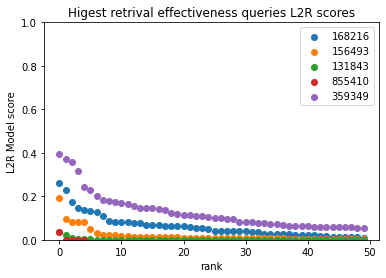

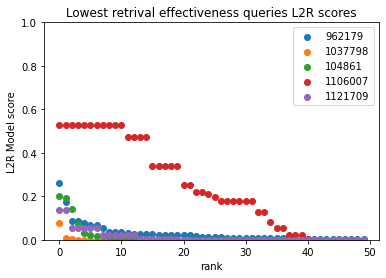

In [45]:
for qid, scores in best_query_scores.items():
  plt.scatter(scores[1], scores[0], label=qid)
plt.ylim([0,1])
plt.legend()
plt.xlabel("rank")
plt.ylabel("L2R Model score")
plt.title("Higest retrival effectiveness queries L2R scores")
plt.savefig('best_L2R.png')
plt.show()

for qid, scores in worst_query_scores.items():
  plt.scatter(scores[1], scores[0], label=qid)
plt.ylim([0,1])
plt.legend()
plt.xlabel("rank")
plt.ylabel("L2R Model score")
plt.title("Lowest retrival effectiveness queries L2R scores")
plt.savefig('worst_L2R.png')
plt.show()